In [27]:
import matplotlib.pyplot as plt
import pandas as pd

Read and describe the given dataset.

In [28]:
house_data = pd.read_csv("housing_california.csv", sep=',')
house_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Create a map with column name for keys and number of null values for values.

Print the sum of rows with null values.
Print the number of rows with null values for each column.

In [29]:
rows_with_null_values = {}
for col_name in house_data.columns:
    col_null_values = house_data[col_name].isnull().sum()
    if col_null_values > 0:
        rows_with_null_values[str(col_name)] = col_null_values
  
print("Number of rows with null values: " + str(sum(rows_with_null_values.values())))
print("Null values per row: ")
print(rows_with_null_values)    

Number of rows with null values: 207
Null values per row: 
{'total_bedrooms': 207}


Replace null values with the respective column average and describe the dataset.

In [30]:
for col_name in rows_with_null_values:
    house_data[col_name] = house_data[col_name].fillna(house_data[col_name].mean())
house_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Create a map for replacing the ocean proximity value with a numeric value.

In [31]:
ocean_proximity_replacement_map = {'INLAND': 1, '<1H OCEAN': 2, 'NEAR OCEAN': 3, 'NEAR BAY': 4, 'ISLAND': 5}

Also create a reversed map for usage in graphs -- we'd like our ticks to have the textual value and not the numeric one.

In [32]:
ocean_proximity_replacement_map_r = {1: 'INLAND', 2: '<1H OCEAN', 3: 'NEAR OCEAN', 4: 'NEAR BAY', 5: 'ISLAND'}

Replace the ocean proximity values with numeric ones.
Describe the dataset.

In [33]:
house_data['ocean_proximity'] = house_data['ocean_proximity'].map(ocean_proximity_replacement_map)
house_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,2.034012
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874,0.943948
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,1.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,1.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000,2.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,2.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,5.000000


Create a function for creating scatter plots for given columns.

In [34]:
def plot(col_name_1, col_name_2):
    plt.figure(figsize=(18, 18))
    fig, ax = plt.subplots()
    plt.scatter(house_data[col_name_1], house_data[col_name_2], alpha=0.1, c=house_data[col_name_1])

    # set y ticks to words
    ticks_loc = ax.get_yticks().tolist()
    ax.set_yticks(ax.get_yticks().tolist())
    ax.set_yticklabels(
        [ocean_proximity_replacement_map_r[x] if x in ocean_proximity_replacement_map_r else '' for x in ticks_loc],
        rotation=55)

    x_title = col_name_1.replace('_', ' ').title()
    y_title = col_name_2.replace('_', ' ').title()
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.title(x_title + ' vs ' + y_title)
    plt.show()

Create a scatter plot for 'median_house_value' vs 'ocean_proximity'.

<Figure size 1296x1296 with 0 Axes>

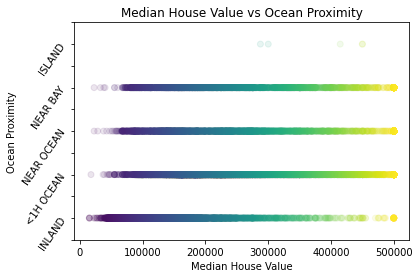

In [35]:
plot('median_house_value', 'ocean_proximity')

Create a scatter plot for 'median_income' vs 'ocean_proximity'.

<Figure size 1296x1296 with 0 Axes>

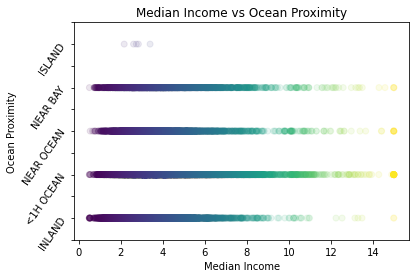

In [36]:
plot('median_income', 'ocean_proximity')

Create a function that returns the number of values above a given value for a specified row.

In [37]:
def count_above(col_name, value):
    return len(house_data[house_data[col_name] > value])

Print the number of houses with 'median_house_value' above 50.000.

In [38]:
print("Median house value > 50.000: " + str(count_above('median_house_value', 500000)))

Median house value > 50.000: 965


Print the number of houses with 'housing_median_age' above 40.

In [39]:
print("Housing Median age > 40: " + str(count_above('housing_median_age', 40)))

Housing Median age > 40: 3878


Find the correlation of 'median_house_value' with all other columns.

In [40]:
print(house_data.corrwith(house_data['median_house_value']).sort_values(ascending=False))

median_house_value    1.000000
median_income         0.688075
ocean_proximity       0.397251
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049454
population           -0.024650
longitude            -0.045967
latitude             -0.144160
dtype: float64


Read the dataset again

In [41]:
house_data = pd.read_csv("housing_california.csv", sep=',')

Remove all rows with null values and describe the dataset.

In [42]:
house_data.dropna(inplace=True)
house_data.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000
